In [111]:
import requests

city = 'Lucknow'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = '37f96394ffe8b6cca1110af3d8270604c711c688'

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
print(data)

{'aqi': 96, 'idx': 13721, 'attributions': [{'url': 'http://cpcb.nic.in/', 'name': 'CPCB - India Central Pollution Control Board', 'logo': 'India-CPCB.png'}, {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}], 'city': {'geo': [26.766433, 80.927299], 'name': 'B R Ambedkar University, Lucknow, India', 'url': 'https://aqicn.org/city/india/lucknow/b-r-ambedkar-university', 'location': ''}, 'dominentpol': 'pm25', 'iaqi': {'co': {'v': 3.4}, 'dew': {'v': 28}, 'h': {'v': 67.4475}, 'no2': {'v': 2.9}, 'o3': {'v': 2.6}, 'p': {'v': 999}, 'pm10': {'v': 52}, 'pm25': {'v': 96}, 'so2': {'v': 11.7}, 't': {'v': 34}, 'w': {'v': 1.2875}}, 'time': {'s': '2022-06-27 16:00:00', 'tz': '+05:30', 'v': 1656345600, 'iso': '2022-06-27T16:00:00+05:30'}, 'forecast': {'daily': {'o3': [{'avg': 27, 'day': '2022-06-25', 'max': 33, 'min': 23}, {'avg': 23, 'day': '2022-06-26', 'max': 35, 'min': 12}, {'avg': 17, 'day': '2022-06-27', 'max': 25, 'min': 12}, {'avg': 12, 'day': '2022-06-28', 'max': 31, 'm

In [112]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])

co : 3.4
dew : 28
h : 67.4475
no2 : 2.9
o3 : 2.6
pm10 : 52
pm25 : 96
so2 : 11.7
t : 34
w : 1.2875


In [113]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} AQI :',aqi,'\n')
print('Individual Air quality')
print('Dew :',dew)
print('no2 :',no2)
print('Ozone :',o3)
print('sulphur :',so2)
print('pm10 :',so2)
print('pm25 :',pm25)

Lucknow AQI : 96 

Individual Air quality
Dew : {'v': 28}
no2 : {'v': 2.9}
Ozone : {'v': 2.6}
sulphur : {'v': 11.7}
pm10 : {'v': 11.7}
pm25 : {'v': 96}


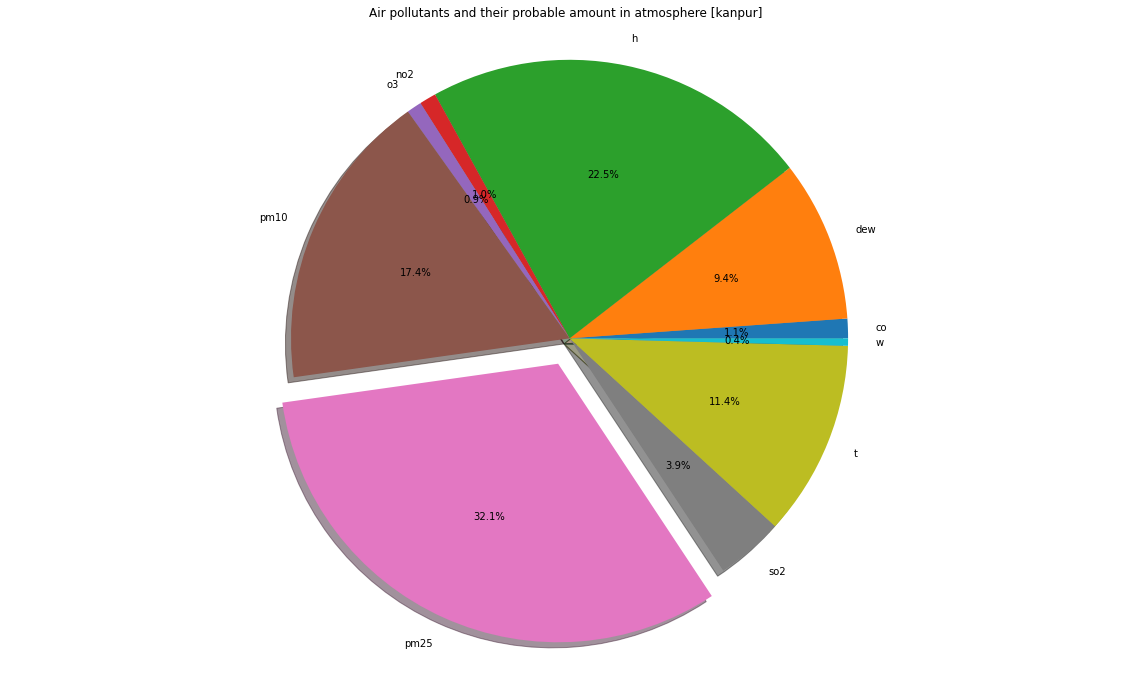

In [114]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(20,12))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere [kanpur]')

plt.axis('equal')
plt.show()

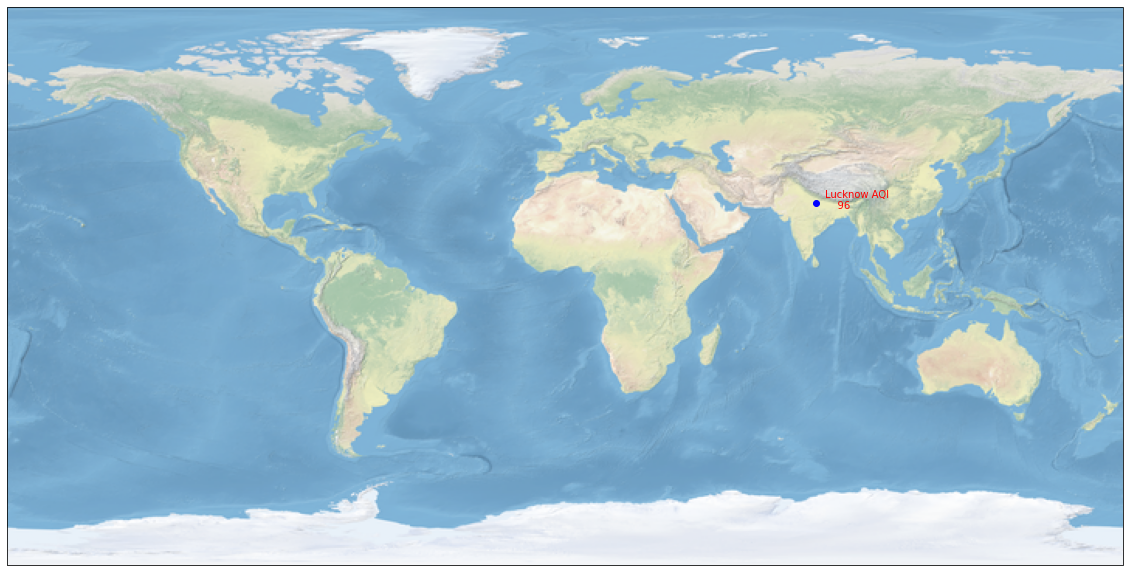

In [115]:
import cartopy.crs as ccrs

geo = data['city']['geo']

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(geo[1],geo[0],color='blue')
plt.text(geo[1] + 3,geo[0]-2,f'{city} AQI \n    {aqi}',color='red')

plt.show()


In [116]:
import pandas as pd


csv_path = r'C:\Users\sharm\Downloads\gomti-nagar, lucknow, india-air-quality.csv'

df = pd.read_csv(csv_path)

df['date'] = pd.to_datetime(df.date)
dft = df.loc[(df['date'] > '2020-03-24') & (df['date'] < '2020-06-24')]
dft = dft.sort_values(by = 'date')
dft.replace(' ', '0', inplace=True)
print(dft)

          date  pm25  pm10   o3  no2  so2  co
892 2020-03-25    89     0   25    2    6   0
893 2020-03-26    75     0   16    3    7   0
894 2020-03-27    85     0   28    3    3   0
895 2020-03-28    73     0   28    2    3   0
896 2020-03-29    66     0   32    2    4   0
..         ...   ...   ...  ...  ...  ...  ..
801 2020-06-19    69     0   20    2    4   0
802 2020-06-20    70     0   16    2    4   0
803 2020-06-21    62     0   14    2    4   0
804 2020-06-22    63     0   15    4    4   0
805 2020-06-23    67     0   20    3    4   0

[90 rows x 7 columns]


In [117]:
dft.columns

dft= dft.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

print(dft.columns)

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')


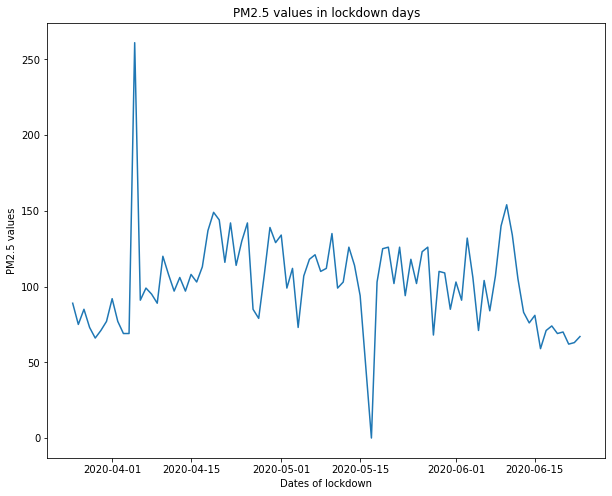

In [118]:
import matplotlib.pyplot as plt

dates = dft['date']
pm25 = dft['pm25']
pm25_i= [int(i) for i in pm25]

plt.figure(figsize=(10,8))

length = len(dates)

plt.plot(dates, pm25_i)
plt.title('PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')
plt.show()

In [119]:
mask = (df['date'] >= '2019-12-05') & (df['date']  < '2020-03-25')

past = df.loc[mask]
past = past.sort_values(by = 'date')
past.replace(' ', '0', inplace=True)
print(past)

          date  pm25  pm10   o3  no2  so2  co
900 2019-12-05   246     0   18   61   10   4
901 2019-12-06   249     0   13   35    9   4
902 2019-12-07   211     0   13   35    7   4
903 2019-12-08   183     0   13   32    6   4
904 2019-12-09   197     0   13   30    7   4
..         ...   ...   ...  ...  ...  ...  ..
888 2020-03-18   127     0   38   26    7   0
889 2020-03-19   138     0   51   19    8   0
890 2020-03-20   158     0   33   11    3   0
891 2020-03-21   119     0    0    0    0   0
931 2020-03-24     0     0   19    7    4   0

[108 rows x 7 columns]


In [122]:
past.columns

past= past.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10", 
                         " o3": "o3",
                         ' no2' : 'no2',
                         ' so2' : 'so2',
                         ' co' : 'co'})

print(past.columns)

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')


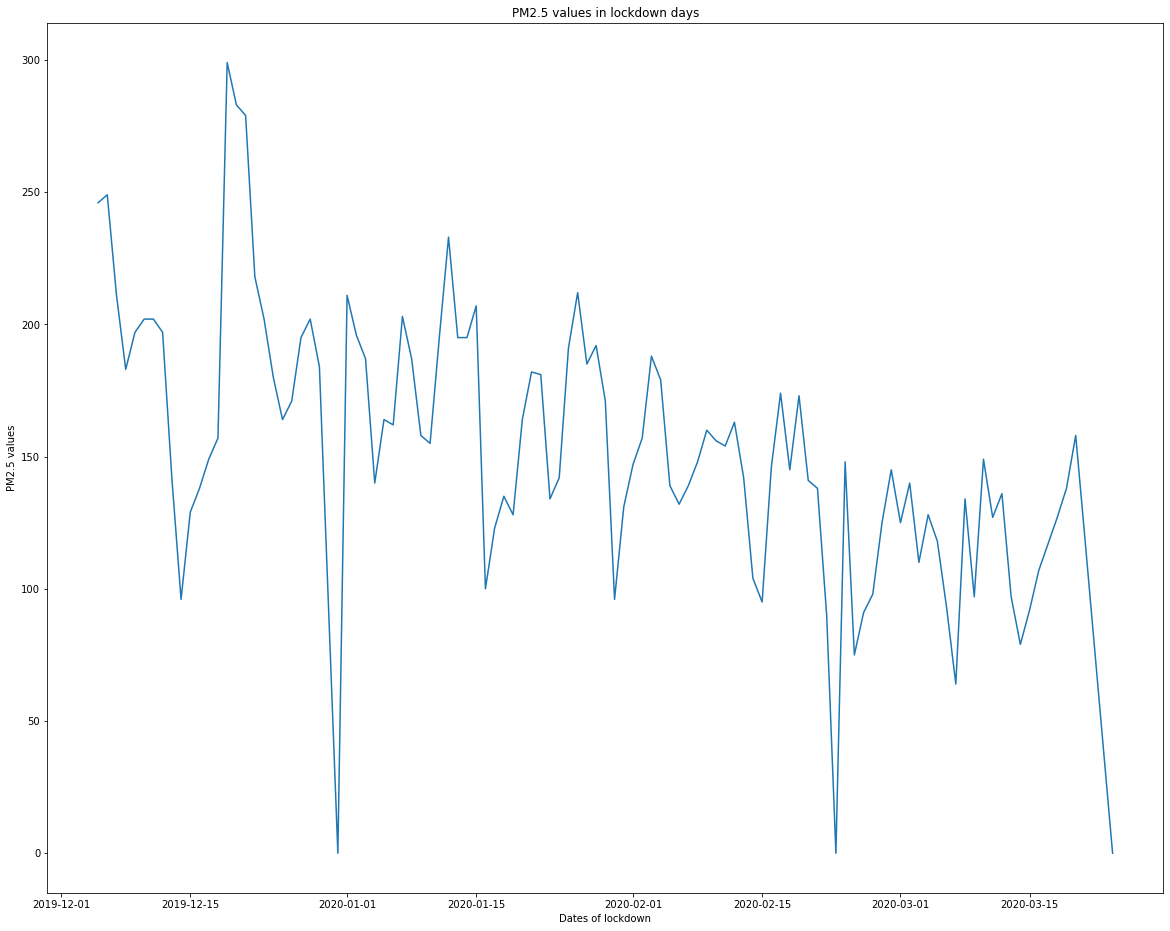

In [123]:
import matplotlib.pyplot as plt

dates_n = past['date']
pm25_n = past['pm25']
pm25_n= [int(i) for i in pm25_n]

plt.figure(figsize=(20,16))

length = len(dates)

plt.plot(dates_n, pm25_n)
plt.title('PM2.5 values in lockdown days')
plt.xlabel('Dates of lockdown')
plt.ylabel('PM2.5 values')
plt.show()

In [132]:
 #On which date pm2.5 value was minimum in kanpur under lockdown

dft['pm25'] = [int(i) for i in dft['pm25']]
print(dft[dft.pm25 == dft.pm25.min()]) 

          date  pm25 pm10   o3 no2 so2 co
927 2020-05-17     0    0   25   8   4  0


In [133]:
#On which date o3 value was maximum in kanpur under lockdown

dft['o3'] = [int(i) for i in dft['o3']]
print(dft[dft.o3 == dft.o3.max()]) 

          date  pm25 pm10  o3 no2 so2 co
760 2020-05-07   121    0  38   5   7  0
761 2020-05-08   110    0  38   5   7  0


In [135]:
#What is the average value of so2 in the lockdown

dft['so2'] = [int(i) for i in dft['so2']]
avgSo2 = dft['so2'].mean()
print('The average value of so2 :',avgSo2)

The average value of so2 : 5.433333333333334


In [136]:
 #On which date pm2.5 value was minimum in kanpur before lockdown

past['pm25'] = [int(i) for i in past['pm25']]
print(past[past.pm25 == past.pm25.min()]) 

          date  pm25 pm10   o3  no2 so2 co
929 2019-12-31     0    0   10   24   7  0
930 2020-02-23     0    0   60   12   7  0
931 2020-03-24     0    0   19    7   4  0


In [137]:
#What is the average value of so2 before lockdown

past['so2'] = [int(i) for i in past['so2']]
avgSo2 = past['so2'].mean()
print('The average value of so2 :',avgSo2)


The average value of so2 : 8.157407407407407
